# Santa 2025 - Christmas Tree Packing Solver v3.0

Optimized solver combining:
- Official Kaggle greedy placement with weighted angles
- Simulated Annealing refinement
- Multi-restart optimization

In [1]:
# ===== CONFIGURATION =====
MODE = "aggressive"  # Options: quick, standard, aggressive, maximum
SEED = 42
MAX_N = 200

# Expected performance:
# quick:      ~20 min,   score ~110-130
# standard:   ~60 min,   score ~90-110
# aggressive: ~2-3 hrs,  score ~75-90
# maximum:    ~5-6 hrs,  score ~65-75

In [2]:
import sys
import os
import time

# Setup paths
if os.path.exists('/kaggle/working'):
    sys.path.insert(0, '/kaggle/working')
else:
    sys.path.insert(0, '.')
    sys.path.insert(0, '..')

print(f"Python: {sys.version}")

Python: 3.12.8 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 10:37:40) [Clang 14.0.6 ]


In [3]:
from src.packing import PackingSolver, SolverConfig
from src.validate import validate_all_solutions, compute_score, print_score_summary
from src.io_utils import create_submission, get_output_path, validate_submission_format
from src.geometry import make_tree_polygon, compute_bounding_square_side

print("✓ Modules loaded")

✓ Modules loaded


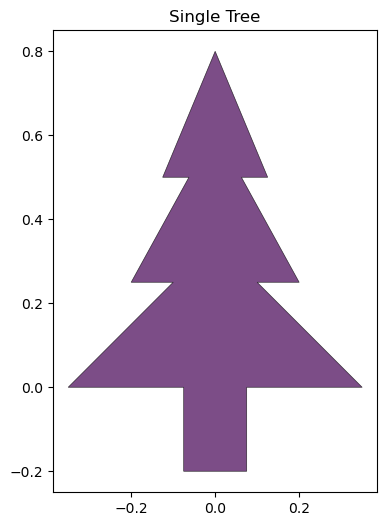

In [4]:
# Visualize tree shape
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon as MplPolygon
from matplotlib.collections import PatchCollection

def plot_trees(placements, title="", ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))
    
    patches = []
    for x, y, deg in placements:
        poly = make_tree_polygon(x, y, deg)
        coords = list(poly.exterior.coords)
        patches.append(MplPolygon(coords, closed=True))
    
    colors = plt.cm.viridis([i/len(patches) for i in range(len(patches))])
    for patch, color in zip(patches, colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')
        patch.set_alpha(0.7)
        patch.set_linewidth(0.5)
        ax.add_patch(patch)
    
    ax.autoscale()
    ax.set_aspect('equal')
    ax.set_title(title)
    return ax

fig, ax = plt.subplots(figsize=(6,6))
plot_trees([(0, 0, 0)], "Single Tree", ax)
plt.show()

In [5]:
# Get configuration
if MODE == "quick":
    config = SolverConfig.quick_mode()
elif MODE == "standard":
    config = SolverConfig.standard_mode()
elif MODE == "aggressive":
    config = SolverConfig.aggressive_mode()
else:
    config = SolverConfig.maximum_mode()

config.seed = SEED

print(f"Mode: {MODE}")
print(f"Placement attempts: {config.num_placement_attempts}")
print(f"SA iterations: {config.sa_iterations_base}")
print(f"Restarts: {config.num_restarts}")

Mode: aggressive
Placement attempts: 40
SA iterations: 8000
Restarts: 3


In [6]:
# RUN SOLVER
print("=" * 60)
print(f"Solving n=1 to {MAX_N}...")
print("=" * 60)

start = time.time()
solver = PackingSolver(config=config, seed=SEED)
solutions = solver.solve_all(max_n=MAX_N, verbose=True)
elapsed = time.time() - start

print("=" * 60)
print(f"Completed in {elapsed:.1f}s ({elapsed/60:.1f} min)")

Solving n=1 to 200...
Solving n=1 to 200...
Config: 8000 SA iterations, 40 placement attempts, 3 restarts
  n=2: side=0.9501
  n=3: side=1.1644
  n=4: side=1.3954
  n=5: side=1.5318
  n=6: side=1.7893
  n=7: side=1.9595
  n=8: side=1.9560
  n=9: side=2.0739
  n=10: side=2.2697
  n=20: side=4.0852
  n=30: side=4.5316
  n=40: side=5.6298
  n=50: side=6.2168
  n=60: side=6.8200
  n=70: side=7.0345
  n=80: side=7.6840
  n=90: side=7.9038
  n=100: side=8.4952
  n=110: side=9.0299
  n=120: side=9.1167
  n=130: side=9.9305
  n=140: side=10.1691
  n=150: side=10.3196
  n=160: side=10.8319
  n=170: side=11.2371
  n=180: side=11.5188
  n=190: side=12.2660
  n=200: side=12.4699

Total score: 146.4127
Completed in 82965.0s (1382.8 min)


In [7]:
# Validate 190
validate_all_solutions(solutions, max_n=MAX_N, verbose=True)

✓ All 200 solutions are valid


True

In [8]:
# Score summary
print_score_summary(solutions, max_n=MAX_N)

SCORE SUMMARY
Total score: 146.4127
Baseline: 157.08
Improvement: 6.8%

Top 10 worst score contributions:
  n=  1: side=1.0000, contrib=1.0000
  n= 12: side=3.2907, contrib=0.9024
  n= 14: side=3.4314, contrib=0.8410
  n= 20: side=4.0852, contrib=0.8345
  n= 13: side=3.2907, contrib=0.8330
  n= 47: side=6.2168, contrib=0.8223
  n= 35: side=5.3477, contrib=0.8171
  n= 48: side=6.2168, contrib=0.8052
  n= 62: side=7.0345, contrib=0.7981
  n=195: side=12.4699, contrib=0.7974

Side length range: 0.9501 - 12.4699


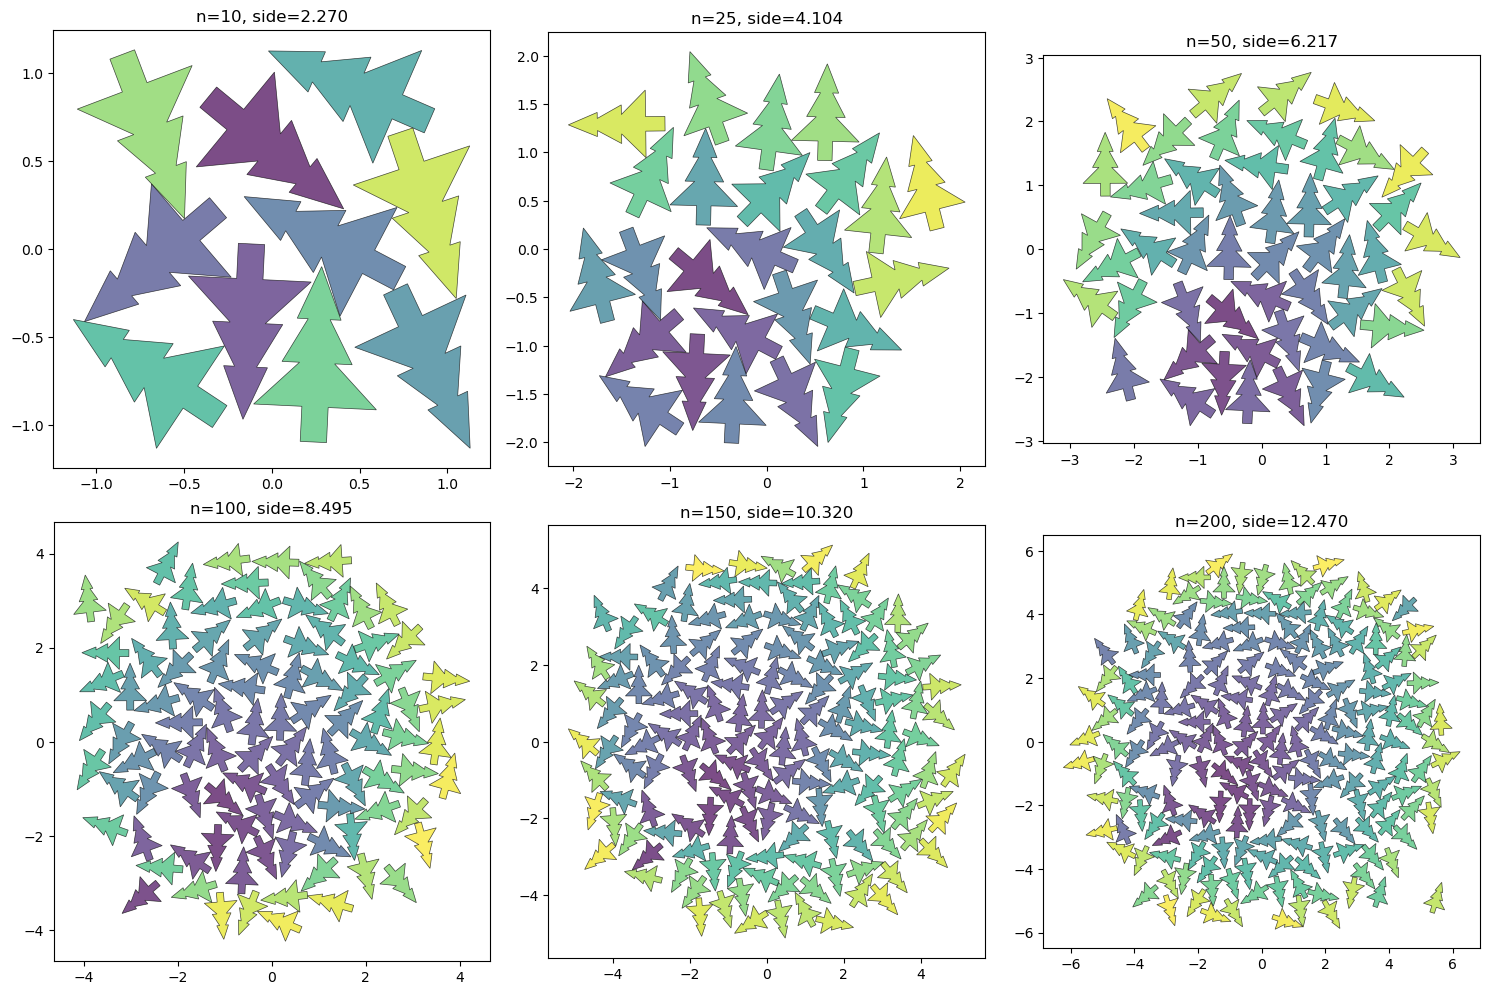

In [9]:
# Visualize some solutions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, n in enumerate([10, 25, 50, 100, 150, 200]):
    if n in solutions and n <= MAX_N:
        side = compute_bounding_square_side(solutions[n])
        plot_trees(solutions[n], f"n={n}, side={side:.3f}", axes[idx])

plt.tight_layout()
plt.show()

In [10]:
# Create submission
output_path = get_output_path("submission.csv")
created = create_submission(solutions, output_path)
print(f"✓ Saved: {created}")

valid, error = validate_submission_format(created)
print(f"Format valid: {valid}")

✓ Saved: submission.csv
Format valid: True


In [11]:
# Preview
import pandas as pd
df = pd.read_csv(output_path)
print(f"Shape: {df.shape}")
print(df.head(10))
print(df.tail(10))

Shape: (20100, 4)
      id          x          y          deg
0  001_0  s0.350000  s0.200000    s0.000000
1  002_0  s0.736818  s0.321299  s113.679719
2  002_1  s0.213298  s0.629378  s293.602439
3  003_0  s0.842119  s0.370897  s336.861970
4  003_1  s0.415614  s0.843730  s293.614382
5  003_2  s0.465692  s0.206280   s35.599417
6  004_0  s1.003877  s0.213423  s337.111044
7  004_1  s0.440493  s0.209098   s33.107644
8  004_2  s1.079295  s1.133457  s154.591604
9  004_3  s0.587549  s0.852431   s47.259606
            id           x           y          deg
20090  200_190   s3.343635  s10.563102  s352.672248
20091  200_191   s2.322101   s9.908860  s344.844824
20092  200_192   s4.518058   s0.520753  s249.892686
20093  200_193   s1.491725   s3.141055  s102.997616
20094  200_194   s0.769960   s5.299601  s105.751198
20095  200_195  s10.861935   s9.353395  s282.043109
20096  200_196   s6.765648   s0.332230  s251.664096
20097  200_197   s4.678128  s11.318996  s306.605867
20098  200_198   s3.274628   s

In [12]:
# Final summary
total_score = compute_score(solutions, MAX_N)
print("\n" + "=" * 60)
print("FINAL RESULTS")
print("=" * 60)
print(f"Score: {total_score:.4f}")
print(f"Baseline: 157.08")
print(f"Improvement: {(157.08 - total_score) / 157.08 * 100:.1f}%")
print(f"Output: {output_path}")


FINAL RESULTS
Score: 146.4127
Baseline: 157.08
Improvement: 6.8%
Output: submission.csv
